In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.ticker as ticker
from scipy.integrate import simps

In [7]:

def get_k_function(current_df, before_df):
    merged_df = pd.merge(current_df, before_df, on=['time', 'ball_id'])
    merged_df['xdiff'] = merged_df['pos_x_x'] - merged_df['pos_x_y']
    merged_df['ydiff'] = merged_df['pos_y_x'] - merged_df['pos_y_y']
    merged_df['xdiff'] = merged_df['xdiff'].apply(abs)
    merged_df['ydiff'] = merged_df['ydiff'].apply(abs)
    result = merged_df.groupby('time').agg({'xdiff': 'sum', 'ydiff': 'sum'})   
    result['distance'] = result[['xdiff', 'ydiff']].apply(lambda row: np.sqrt(row['xdiff']**2 + row['ydiff']**2), axis=1)
    result = result[['distance']]
    return result



In [27]:
def plot_data_frame(df, label=None): 
    time = df.index.values
    time = np.clip(time, 0, 10)
    dist = df['distance'].values
    plt.plot(time, dist, label=label)    
    plt.xlabel('Tiempo(s)')
    plt.ylabel('Distancia con menor precisión')
    plt.yscale('log') 

    

In [28]:
def plot_results(results):
    labels = ['k=2', 'k=3', 'k=4', 'k=5']
    for df,label in zip(results,labels): 
        plot_data_frame(df, label=label)
    plt.legend()
    plt.show()

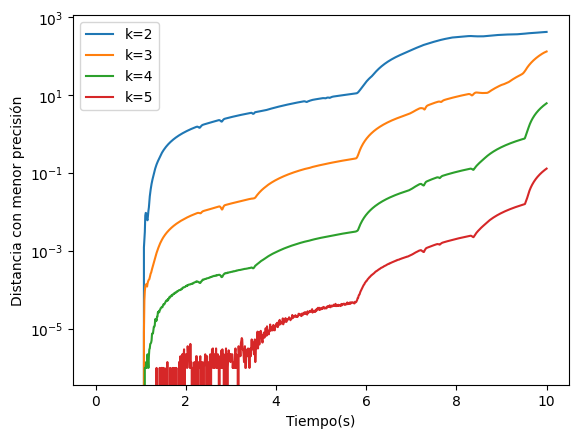

In [39]:
    path = r'../tp4/out/pool/dt'
    regex = '*.csv'
    files = sorted(Path(path).glob(regex))
    results = []
    for index in range(1,len(files)): 
        current_df = pd.read_csv(files[index])
        before_df = pd.read_csv(files[index - 1])
        result = get_k_function(current_df, before_df)
        results.append(result)
    plot_results(results)